## Support Vector Machines (SVMs)

In [358]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [359]:
# Loading the dataset
new_df = pd.read_csv("final_df4.csv")

In [360]:
new_df.head()

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
1,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
2,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
3,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
4,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella


In [361]:
new_df.isnull().sum()

driver_number        0
position             0
points               0
grid                 0
laps                 0
status               0
driver_id            0
constructor_id       0
fastest_lap_rank     0
fastest_lap          0
fastest_lap_time     0
fastest_lap_speed    0
raceName             0
date                 0
season               0
driverId             0
dateOfBirth          0
nationality          0
driverFullName       0
dtype: int64

In [362]:
# Aggregating season data for each driver
season_summary = new_df.groupby(['season', 'driver_id']).agg(
    total_points=pd.NamedAgg(column='points', aggfunc='sum'),
    total_wins=pd.NamedAgg(column='position', aggfunc=lambda x: (x==1).sum()),  # Count wins
    total_podiums=pd.NamedAgg(column='position', aggfunc=lambda x: (x<=3).sum()),  # Count podiums
    average_finish_position=pd.NamedAgg(column='position', aggfunc='mean'),
    races_participated=pd.NamedAgg(column='raceName', aggfunc='count')  # Count races participated
).reset_index()

# Determining the driver with the highest points in each season as the champion
season_summary['is_champion'] = season_summary.sort_values(['season', 'total_points'], ascending=[True, False]).groupby(['season']).cumcount() == 0

# Converting boolean 'is_champion' to binary format: 1 for champions, 0 for others
season_summary['is_champion'] = season_summary['is_champion'].astype(int)

In [363]:
season_summary

,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated,is_champion
0,2000,alesi,0.0,0,0,16.117647,17,0
1,2000,barrichello,62.0,1,9,6.294118,17,0
2,2000,burti,0.0,0,0,11.000000,1,0
3,2000,button,12.0,0,0,11.235294,17,0
4,2000,coulthard,73.0,3,11,5.176471,17,0
...,...,...,...,...,...,...,...,...
569,2023,sainz,178.0,1,3,7.500000,22,0
570,2023,sargeant,1.0,0,0,15.818182,22,0
571,2023,stroll,68.0,0,0,11.181818,22,0
572,2023,tsunoda,14.0,0,0,13.181818,22,0


In [364]:
champion_rows = season_summary[season_summary['is_champion'] == 1]
champion_rows

,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated,is_champion
14,2000,michael_schumacher,108.0,9,12,5.294118,17,1
38,2001,michael_schumacher,123.0,9,14,3.352941,17,1
60,2002,michael_schumacher,144.0,11,17,1.411765,17,1
84,2003,michael_schumacher,93.0,6,8,4.250000,16,1
109,2004,michael_schumacher,148.0,13,15,2.611111,18,1
122,2005,alonso,133.0,7,15,3.631579,19,1
149,2006,alonso,134.0,7,14,3.555556,18,1
190,2007,raikkonen,110.0,6,12,4.235294,17,1
209,2008,hamilton,98.0,5,10,5.222222,18,1
229,2009,button,95.0,6,9,4.352941,17,1


## Preparing the dataset for model training¶

In [365]:
categorical_columns = ['driver_id']
encoder = LabelEncoder()
for col in categorical_columns:
    season_summary[col] = encoder.fit_transform(season_summary[col])

In [366]:
season_summary

,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated,is_champion
0,2000,3,0.0,0,0,16.117647,17,0
1,2000,8,62.0,1,9,6.294118,17,0
2,2000,17,0.0,0,0,11.000000,1,0
3,2000,18,12.0,0,0,11.235294,17,0
4,2000,21,73.0,3,11,5.176471,17,0
...,...,...,...,...,...,...,...,...
569,2023,99,178.0,1,3,7.500000,22,0
570,2023,101,1.0,0,0,15.818182,22,0
571,2023,106,68.0,0,0,11.181818,22,0
572,2023,109,14.0,0,0,13.181818,22,0


In [367]:
numerical_columns = ['total_points', 'total_wins', 'total_podiums', 'average_finish_position', 'races_participated']
scaler = StandardScaler()
season_summary[numerical_columns] = scaler.fit_transform(season_summary[numerical_columns])

In [368]:
season_summary

,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated,is_champion
0,2000,3,-0.665501,-0.351551,-0.557793,1.133584,0.051160,0
1,2000,8,0.018489,0.091944,1.553238,-1.258128,0.051160,0
2,2000,17,-0.665501,-0.351551,-0.557793,-0.112397,-2.922601,0
3,2000,18,-0.533116,-0.351551,-0.557793,-0.055111,0.051160,0
4,2000,21,0.139843,0.978934,2.022356,-1.530239,0.051160,0
...,...,...,...,...,...,...,...,...
569,2023,99,1.298214,0.091944,0.145884,-0.964534,0.980460,0
570,2023,101,-0.654469,-0.351551,-0.557793,1.060674,0.980460,0
571,2023,106,0.084682,-0.351551,-0.557793,-0.068131,0.980460,0
572,2023,109,-0.511052,-0.351551,-0.557793,0.418805,0.980460,0


In [369]:
X = season_summary.drop('is_champion', axis=1)
y = season_summary['is_champion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [370]:
print("Training Set X_train:")
X_train

Training Set X_train:


,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated
182,2007,41,0.536998,1.422429,2.256915,-1.830993,0.05116
63,2002,91,-0.400731,-0.351551,0.380443,-0.026468,0.05116
158,2006,56,-0.599309,-0.351551,-0.323234,-0.031242,-1.99330
60,2002,73,0.923122,4.526895,3.429710,-2.446823,0.05116
15,2000,92,-0.400731,-0.351551,0.145884,-0.441795,0.05116
...,...,...,...,...,...,...,...
71,2002,120,-0.665501,-0.351551,-0.557793,1.030028,-0.69228
106,2004,53,-0.632405,-0.351551,-0.557793,0.401590,0.23702
270,2010,107,-0.146992,-0.351551,-0.557793,0.067000,0.42288
435,2017,68,1.187893,0.535439,0.380443,-0.526292,0.60874


In [371]:
print("Training Set y_train:")
y_train

Training Set y_train:


182    0
63     0
158    0
60     1
15     0
      ..
71     0
106    0
270    0
435    0
102    0
Name: is_champion, Length: 459, dtype: int64

In [372]:
print("Testing Set X_test:")
X_test

Testing Set X_test:


,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated
514,2021,56,-0.665501,-0.351551,-0.557793,0.739739,-2.736741
70,2002,115,-0.643437,-0.351551,-0.557793,0.646649,0.051160
131,2005,50,-0.610341,-0.351551,-0.557793,0.835845,0.422880
422,2017,11,2.699292,0.978934,2.491474,-1.901885,0.608740
545,2022,94,-0.290410,-0.351551,-0.557793,0.252804,0.980460
...,...,...,...,...,...,...,...
75,2003,18,-0.477955,-0.351551,-0.557793,-0.158048,-0.134700
250,2010,8,-0.146992,-0.351551,-0.557793,-0.099583,0.422880
531,2022,5,0.228099,-0.351551,-0.557793,-0.145598,0.980460
509,2021,5,0.228099,-0.351551,-0.323234,-0.377999,0.980460


In [373]:
print("Testing Set y_test:")
y_test

Testing Set y_test:


514    0
70     0
131    0
422    0
545    0
      ..
75     0
250    0
531    0
509    0
68     0
Name: is_champion, Length: 115, dtype: int64

In [340]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd


def train_svm_models(X_features_train, Y_targets_train, X_features_test, Y_targets_test):
    kernel_types = ['linear', 'rbf', 'poly']
    regularization_values = [0.1, 10, 100]
    model_results = []

    # Train SVM models with different kernel types and regularization values
    for kernel in kernel_types:
        for C in regularization_values:
            svm_model = SVC(kernel=kernel, C=C, random_state=42)
            svm_model.fit(X_features_train, Y_targets_train)
            Y_predictions = svm_model.predict(X_features_test)
            model_accuracy = accuracy_score(Y_targets_test, Y_predictions)
            model_results.append({
                'Kernel Type': kernel,
                'Regularization Value': C,
                'Model Accuracy': model_accuracy
            })
            print(f"Kernel Type: {kernel}, Regularization Value: {C}, Model Accuracy: {model_accuracy:.4f}")
            
    # Create a DataFrame with the model results
    model_results_df = pd.DataFrame(model_results)
    return model_results_df

# Example usage:
# Assuming X_features_train, Y_targets_train, X_features_test, Y_targets_test are already defined
results_df = train_svm_models(X_train, y_train, X_test, y_test)
results_df

Kernel Type: linear, Regularization Value: 0.1, Model Accuracy: 0.9652
Kernel Type: linear, Regularization Value: 10, Model Accuracy: 0.9565
Kernel Type: linear, Regularization Value: 100, Model Accuracy: 0.9565
Kernel Type: rbf, Regularization Value: 0.1, Model Accuracy: 0.9478
Kernel Type: rbf, Regularization Value: 10, Model Accuracy: 0.9478
Kernel Type: rbf, Regularization Value: 100, Model Accuracy: 0.9478
Kernel Type: poly, Regularization Value: 0.1, Model Accuracy: 0.9478
Kernel Type: poly, Regularization Value: 10, Model Accuracy: 0.9478
Kernel Type: poly, Regularization Value: 100, Model Accuracy: 0.9478


,Kernel Type,Regularization Value,Model Accuracy
0,linear,0.1,0.965217
1,linear,10.0,0.956522
2,linear,100.0,0.956522
3,rbf,0.1,0.947826
4,rbf,10.0,0.947826
5,rbf,100.0,0.947826
6,poly,0.1,0.947826
7,poly,10.0,0.947826
8,poly,100.0,0.947826


## Performing cross validation to check the overfitting of the data

In [341]:
from sklearn.model_selection import cross_val_score
import numpy as np

X_data = season_summary.drop('is_champion', axis=1)  # All feature columns
y_targets = season_summary['is_champion']  # The target column

def evaluate_svm(X_data, y_targets):
    kernel_types = ['linear', 'rbf', 'poly']
    regularization_values = [0.1, 10, 100]
    evaluation_results = []

    for kernel_type in kernel_types:
        for reg_value in regularization_values:
            svm_model = SVC(kernel=kernel_type, C=reg_value, random_state=42)
            # Perform k-fold cross-validation (k=5)
            validation_scores = cross_val_score(svm_model, X_data, y_targets, cv=5)
            evaluation_results.append({
                'Kernel Type': kernel_type,
                'Regularization Value': reg_value,
                'Mean Accuracy': np.mean(validation_scores),
                'Standard Deviation': np.std(validation_scores)
            })
            print(f"Kernel: {kernel_type}, C: {reg_value}, Mean Accuracy: {np.mean(validation_scores):.4f}, Std Dev: {np.std(validation_scores):.4f}")

    # Create a DataFrame with the evaluation results
    results_df = pd.DataFrame(evaluation_results)
    return results_df

# Example usage:
# Assuming X_data and y_targets are your features and labels
svm_evaluation_df = evaluate_svm(X_data, y_targets)
svm_evaluation_df


Kernel: linear, C: 0.1, Mean Accuracy: 0.9791, Std Dev: 0.0203
Kernel: linear, C: 10, Mean Accuracy: 0.9791, Std Dev: 0.0203
Kernel: linear, C: 100, Mean Accuracy: 0.9739, Std Dev: 0.0190
Kernel: rbf, C: 0.1, Mean Accuracy: 0.9582, Std Dev: 0.0034
Kernel: rbf, C: 10, Mean Accuracy: 0.9582, Std Dev: 0.0034
Kernel: rbf, C: 100, Mean Accuracy: 0.9582, Std Dev: 0.0034
Kernel: poly, C: 0.1, Mean Accuracy: 0.9582, Std Dev: 0.0034
Kernel: poly, C: 10, Mean Accuracy: 0.9582, Std Dev: 0.0034
Kernel: poly, C: 100, Mean Accuracy: 0.9582, Std Dev: 0.0034


,Kernel Type,Regularization Value,Mean Accuracy,Standard Deviation
0,linear,0.1,0.979115,0.020272
1,linear,10.0,0.979115,0.020272
2,linear,100.0,0.973898,0.019037
3,rbf,0.1,0.958200,0.003356
4,rbf,10.0,0.958200,0.003356
5,rbf,100.0,0.958200,0.003356
6,poly,0.1,0.958200,0.003356
7,poly,10.0,0.958200,0.003356
8,poly,100.0,0.958200,0.003356


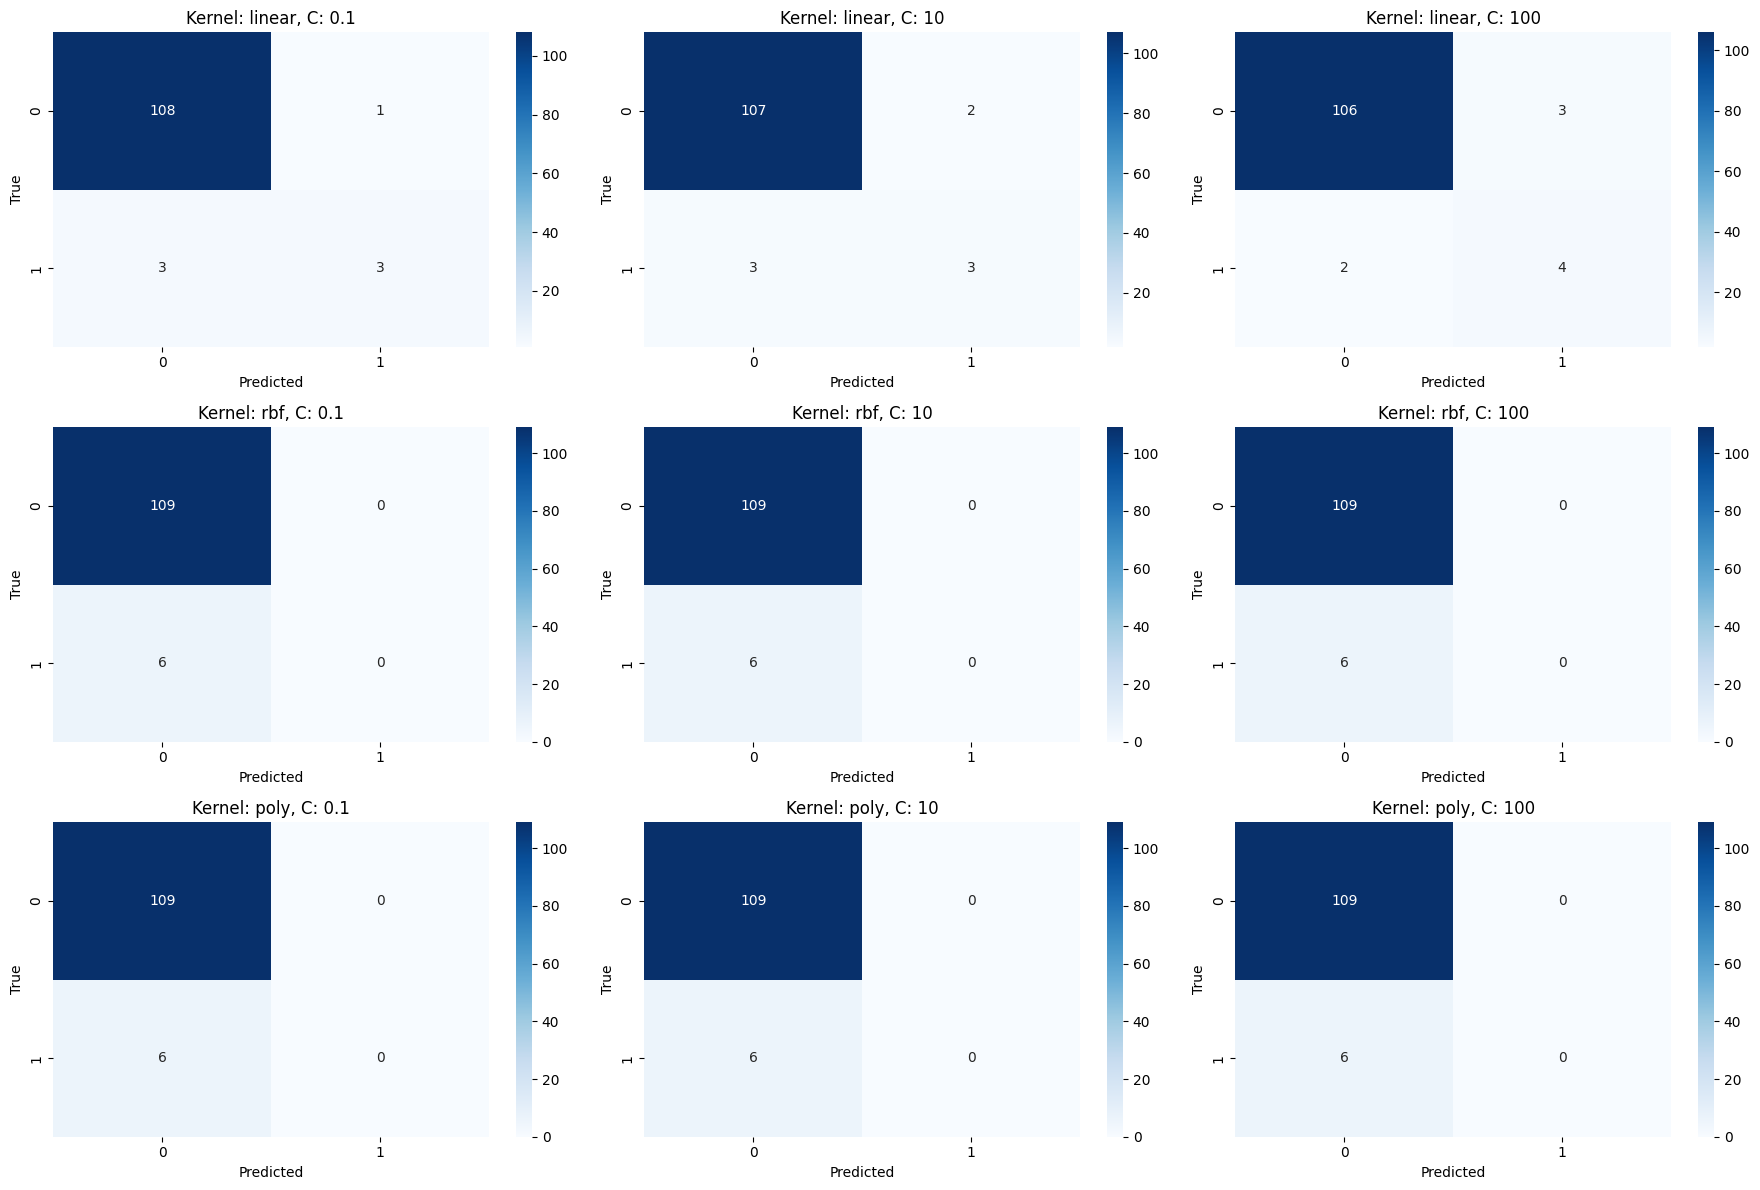

In [342]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def svm_evaluation_with_visualization(X_train, y_train, X_test, y_test):
    kernel_types = ['linear', 'rbf', 'poly']
    regularization_values = [0.1, 10, 100]
    
    plt.figure(figsize=(18, 12))
    plot_number = 1  # To manage subplot index
    
    for kernel in kernel_types:
        for C in regularization_values:
            svm_model = SVC(kernel=kernel, C=C, random_state=42)
            svm_model.fit(X_train, y_train)
            y_pred = svm_model.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)

            # Visualization: plot confusion matrix using Seaborn
            ax = plt.subplot(len(kernel_types), len(regularization_values), plot_number)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_title(f'Kernel: {kernel}, C: {C}')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('True')
            plot_number += 1  # Increment subplot index

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

# Example usage:
# Assuming X_train, y_train, X_test, y_test are already defined
svm_evaluation_with_visualization(X_train, y_train, X_test, y_test)

In [343]:
results_df

,Kernel Type,Regularization Value,Model Accuracy
0,linear,0.1,0.965217
1,linear,10.0,0.956522
2,linear,100.0,0.956522
3,rbf,0.1,0.947826
4,rbf,10.0,0.947826
5,rbf,100.0,0.947826
6,poly,0.1,0.947826
7,poly,10.0,0.947826
8,poly,100.0,0.947826


In [346]:
import plotly.express as px


linear_results = results_df[results_df['Kernel Type'] == 'linear']
rbf_results = results_df[results_df['Kernel Type'] == 'rbf']
poly_results = results_df[results_df['Kernel Type'] == 'poly']

def create_bar_plot_for_kernel(kernel_results, kernel_name):
    fig = px.bar(
        kernel_results,
        x='Regularization Value',
        y='Model Accuracy',
        title=f'SVM Model Accuracy for {kernel_name.capitalize()} Kernel Across Different C Values',
        color='Regularization Value',
        barmode='group'
    )
    fig.update_layout(
        xaxis_title='Regularization Value (C)',
        yaxis_title='Accuracy',
        legend_title='Regularization Value'
    )
    return fig

fig_linear = create_bar_plot_for_kernel(linear_results, 'linear')
fig_rbf = create_bar_plot_for_kernel(rbf_results, 'rbf')
fig_poly = create_bar_plot_for_kernel(poly_results, 'poly')

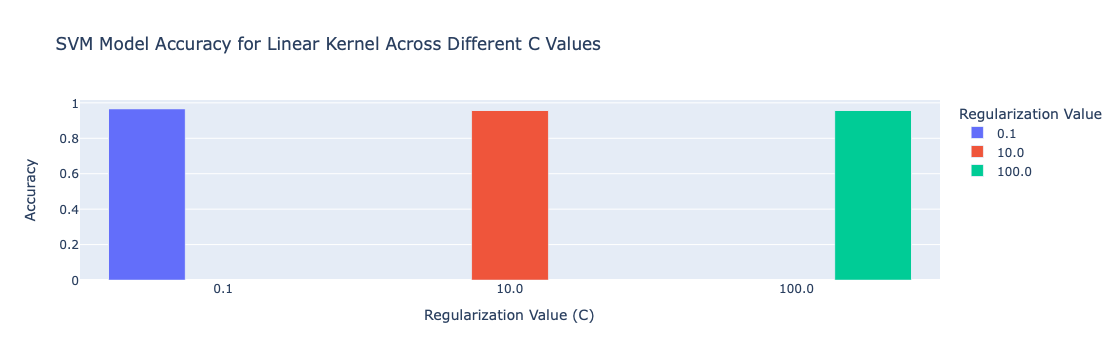

In [357]:
fig_linear.show()

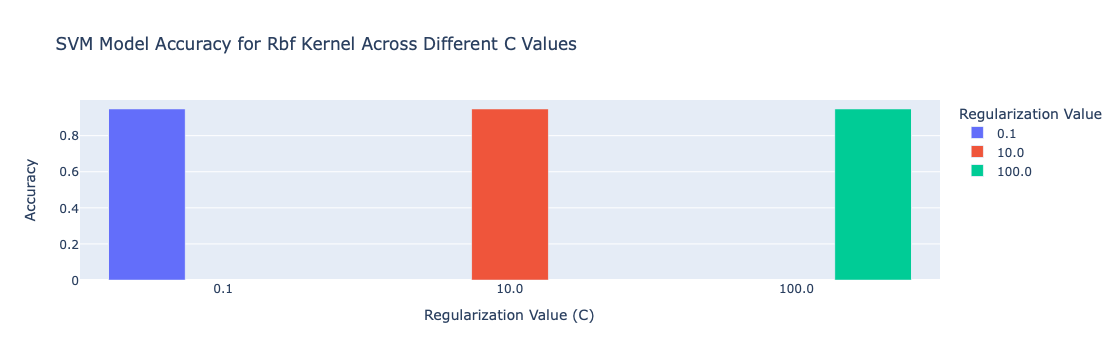

In [354]:
fig_rbf.show()

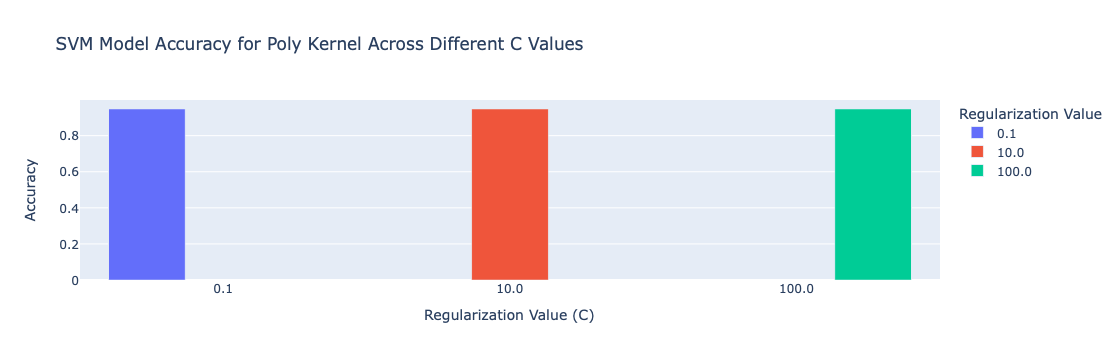

In [356]:
fig_poly.show()